In [1]:
import pandas as pd
import ast
from ast import literal_eval
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics
import networkx as nx
from collections import Counter, defaultdict
import matplotlib.cm as cm
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community import modularity
import pandas as pd

from itertools import combinations

# Importing Data 

In [2]:
entities_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/entities-all-MD_GBIF_v3.csv', encoding='utf-8')
entities_df

,fileMain_s,TaxoEntitiesMD2_GBIF
0,https://hal.inrae.fr/hal-03461601/document,"[[('GBIF:3183002', 'clove', 0.7634411454200745..."
1,https://hal.science/hal-03829927/document,"[[('GBIF:9065640', 'Tyto novaehollandiae novae..."
2,https://hal.science/hal-02350603/document,[]
3,https://shs.hal.science/halshs-02937670/document,"[[('GBIF:5786457', 'Sateré Marmoset', 0.771187..."
4,https://cnam.hal.science/hal-04080723/document,"[[('GBIF:4494312', 'Spilomena beata Blüthgen',..."
...,...,...
1151,https://hal.sorbonne-universite.fr/hal-0295053...,"[[('GBIF:2368377', 'Oryzias latipes', 1.0)], [..."
1152,https://u-picardie.hal.science/hal-03619105/do...,"[[('GBIF:4667268', 'Agustina', 0.7207658290863..."
1153,https://hal.inrae.fr/hal-02636091/document,"[[('GBIF:2438660', 'European Pine Vole', 0.730..."
1154,https://hal.science/hal-04167917/document,"[[('GBIF:2432958', 'Hypsignathus monstrosus', ..."


In [3]:
topics_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_BERTopic_LDA.csv', sep='\t', encoding='utf-8')
topics_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}"
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2..."
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30: 5.2..."
1152,"['Think globally, measure locally: The MIREN s...",Ecology and Evolution,"['Haider', 'Lembrechts', 'Mcdougall', 'Pauchar...","['Sylvia Haider', 'Jonas J. Lembrechts', 'Keit...",['Climate change and other global change dri

In [4]:
dates_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/papers_dates.csv')
dates_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,submittedDate_s,releasedDateY_i,abstract_s,fileMain_s
0,['Lifetime nutrient dynamics reveal simultaneo...,Ecology,"['Casas', 'Pincebourde', 'Mandonμf. Vannier', ...","['J. Casas', 'Sylvain Pincebourde', 'N. Mandon...",2005-11-24 11:13:25,2005.0,NaN,NaN
1,['Quantifying the impact of environmental fact...,Journal of Applied Ecology,"['Schweiger', 'Maelfait', 'van Wingerden', 'He...","['Oliver Schweiger', 'J.P. Maelfait', 'Walter ...",2005-12-01 13:28:48,2005.0,NaN,NaN
2,['Nutritional ecology of insect plant-interact...,Oikos,"['van Loon', 'Pincebourde', 'Casas']","['J. van Loon', 'Sylvain Pincebourde', 'J. Cas...",2005-11-24 11:06:57,2005.0,NaN,NaN
3,['Tre allometry and improved estimation of car...,Oecologia,"['Chave', 'Andalo', 'Brown', 'Cairns', 'Q. Cha...","['Jérôme Chave', 'Christophe Andalo', 'S. Brow...",2006-11-10 16:31:56,2006.0,NaN,NaN
4,['Tracing individual movements of aphids revea...,Ecological Applications,"['Vialatte', 'Simon', 'Dedryver', 'Fabre', 'Pl...","['Aude Vialatte', 'Jean-Christophe Simon', 'Ch...",2006-07-18 13:53:54,2006.0,['Agricultural pests are not restricted to cro...,NaN
...,...,...,...,...,...,...,...,...
2928,['Maritime international trade and bioinvasion...,Journal of Applied Ecology,"['Badou', 'Missihoun', 'Agbangla', 'Gauthier',...","['Sylvestre Badou', 'Antoine A. Missihoun', 'C...",2024-01-02 10:46:41,2024.0,['1. International trade has been favouring th...,https://hal.inrae.fr/hal-04369169/document
2929,['Perspectives in modelling ecological interac...,Journal of Applied Ecology,"['Quévreux', 'Brose', 'Galiana', 'Potapov', 'T...","['Pierre Quévreux', 'Ulrich Brose', 'Núria Gal...",2024-01-27 11:37:50,2024.0,['The concept of ecological interaction networ...,https://hal.science/hal-04421063/document
2930,['Bank vole alarm pheromone chemistry and effe...,Oecologia,"['Sievert', 'Ylönen', 'Blande', 'Saunier', 'va...","['Thorbjörn Sievert', 'Hannu Ylönen', 'James B...",2024-02-06 10:15:07,2024.0,['Abstract Chemical communication plays an imp...,NaN
2931,['What it takes to invade grassland ecosystems...,Ecology Letters,"['Carboni', 'Münkemüller', 'Lavergne', 'Choler...","['Marta Carboni', 'Tamara Münkemüller', 'Sebas...",2024-01-18 08:54:06,2024.0,"[""Whether the success of alien species can be ...",https://hal.umontpellier.fr/hal-01811228/document


In [5]:
merged_df = pd.merge(topics_df, entities_df, on='fileMain_s', how='inner')
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745..."
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[]
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30:

In [6]:
merged_df = pd.merge(merged_df, dates_df[['fileMain_s', 'releasedDateY_i']], on='fileMain_s', how='inner')
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022.0
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024.0
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019.0
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022.0
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,HAL Id: hal-02950535 https://hal.sorbonne-univ...,httpshalsorbonneuniversitefrhal sep multidisci...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1,

In [7]:
''' Not workiig, returning NONE in every field
def complement_hal(df, hal_existing_field, column, hal_field_target):
    import requests
    """
    Complements a DataFrame with additional data retrieved from the HAL API.

    Parameters:
    - df: DataFrame to be complemented.
    - hal_existing_field: Field in the HAL API corresponding to a column in the DataFrame.
    - column: Column name in the DataFrame that corresponds to the HAL existing field.
    - hal_field_target: Field name in the HAL API from which to extract data.

    Returns:
    - DataFrame with a new column containing the data from hal_field_target.
    """
    # Initialize an empty list to store the new data
    new_data = []
    
    # Base URL for the HAL API
    base_url = "https://api.archives-ouvertes.fr/search/?"
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Prepare the query
        query = f"{base_url}q={hal_existing_field}:{row[column]}&fl={hal_field_target}&rows=1"
        #print(query)
        
        # Try to fetch the data from HAL API
        try:
            response = requests.get(query, timeout=30)  # 30-second timeout
            data = response.json()  # Parse the JSON response
            
            # Extract the target field if available
            if data.get('response') and data['response'].get('docs') and len(data['response']['docs']) > 0:
                new_data.append(data['response']['docs'][0].get(hal_field_target, None))
            else:
                new_data.append(None)
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            new_data.append(None)
    
    # Add the new data to the DataFrame as a new column
    df[hal_field_target] = new_data
    
    return df

# Example usage
merged_df = complement_hal(merged_df, 'title_s', 'title_s', 'submittedDate_s')
merged_df
'''

' Not workiig, returning NONE in every field\ndef complement_hal(df, hal_existing_field, column, hal_field_target):\n    import requests\n    """\n    Complements a DataFrame with additional data retrieved from the HAL API.\n\n    Parameters:\n    - df: DataFrame to be complemented.\n    - hal_existing_field: Field in the HAL API corresponding to a column in the DataFrame.\n    - column: Column name in the DataFrame that corresponds to the HAL existing field.\n    - hal_field_target: Field name in the HAL API from which to extract data.\n\n    Returns:\n    - DataFrame with a new column containing the data from hal_field_target.\n    """\n    # Initialize an empty list to store the new data\n    new_data = []\n    \n    # Base URL for the HAL API\n    base_url = "https://api.archives-ouvertes.fr/search/?"\n    \n    # Iterate over each row in the DataFrame\n    for index, row in df.iterrows():\n        # Prepare the query\n        query = f"{base_url}q={hal_existing_field}:{row[column]

In [8]:


def parse_LDAtopics(row):
    try:
        # Convert string representation of dictionary to actual dictionary
        topics_dict = ast.literal_eval(row)
        if isinstance(topics_dict, dict):
            # Prepend 'L' to each topic number in the keys
            return {f"L{key}": value for key, value in topics_dict.items()}
    except ValueError as e:
        print(f"Error parsing row: {e}")  # Print the error message if there's an issue
        return {}
    return {}

# Example DataFrame column parsing
merged_df['Parsed_TopicsLDA'] = merged_df['TopicsLDA'].apply(parse_LDAtopics)

merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,content_text,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022.0,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,HAL Id: hal-03829927 https://hal.science/hal-0...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024.0,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,People and Nature. 2019;1:31–43. | 31 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019.0,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':..."
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,HAL Id: halshs-02937670 https://shs.hal.scienc...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022.0,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':..."
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,People and Nature. 2023;5:69–83. | 69 wileyonl...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023.0,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053

In [9]:
import pandas as pd
from collections import Counter
import ast

# Define a function to parse the string representation of the list and return a Counter dictionary
def parse_and_count_topics(topic_string):
    # Convert the string representation of a list to an actual list using ast.literal_eval
    topic_list = ast.literal_eval(topic_string)
    # Create a Counter dictionary from the list to count the occurrence of each topic
    topic_counter = Counter(f"B{topic}" for topic in topic_list)
    return dict(topic_counter)

# Apply the function to each row in the 'Chunks_BERTopics' column to create the new 'Parsed_BERTopics' column
merged_df['Parsed_BERTopics'] = merged_df['Chunks_BERTopics'].apply(parse_and_count_topics)

# Now the 'Parsed_BERTopics' column contains a dictionary with the count of each topic for that row
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,cleaned_content_text,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,...,httpshalinraefrhal dec multidisciplinary open ...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022.0,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,...,httpshalsciencehal mar multidisciplinary open ...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024.0,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}"
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,...,people nature wileyonlinelibrarycomjournalpan ...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019.0,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}"
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,...,halshs httpsshshalsciencehalshs multidisciplin...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022.0,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}"
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,...,people nature wileyonlinelibrarycomjournalpan ...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023.0,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', '

# Gender - Extracting more information

In [10]:


# Convert string representation of lists back to actual lists
merged_df['Genders'] = merged_df['Genders'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now, define the counting function
def count_genders(gender_list):
    return dict(Counter(gender_list))

# Apply the counting function
merged_df['Gender_Counts'] = merged_df['Genders'].apply(count_genders)

merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,contentLen,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"[female, female, male, male, unknown, unknown]",33.333333,...,48604,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022.0,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}"
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"[male, male, male, female, unknown, male, fema...",8.333333,...,47810,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024.0,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly..."
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,47819,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019.0,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}"
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"[female, female]",0.000000,...,68504,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022.0,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2}
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"[male, male, female, female, male, female, mal...",0.000000,...,58880,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023.0,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"[female, male, male, male, female, female, mal...",0.000000,...,55877,['httpshalsorbonneuniversitefrhal sep multidis...,14,"[0, 32, 32,

In [11]:
gender_values = {
        'male': -1,
        'female': 1,
        'mostly_female': 0.5,
        'mostly_male': -0.5,
        'unknown': 0,
        'andy' : 0
    }

def assign_numeric_value(gender_list):
    ''' Assign a numeric value to each row depending on the number of males and females participating
    '''
    # Mapping each gender to its corresponding value

    
    # Calculate the sum of values based on the gender list
    value_sum = sum(gender_values.get(gender, 0) for gender in gender_list)
    
    # Calculate the average value
    average_value = value_sum / len(gender_list)
    
    return average_value

# Apply the function to create the new column
merged_df['Gender_Numeric_Avg'] = merged_df['Genders'].apply(assign_numeric_value)
merged_df.head(20)

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,chunks,numChunks,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"[female, female, male, male, unknown, unknown]",33.333333,...,['httpshalinraefrhal dec multidisciplinary ope...,12,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022.0,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"[male, male, male, female, unknown, male, fema...",8.333333,...,['httpshalsciencehal mar multidisciplinary ope...,12,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024.0,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,['people nature wileyonlinelibrarycomjournalpa...,12,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019.0,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"[female, female]",0.000000,...,['halshs httpsshshalsciencehalshs multidiscipl...,16,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022.0,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"[male, male, female, female, male, female, mal...",0.000000,...,['people nature wileyonlinelibrarycomjournalpa...,14,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023.0,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000
5,['What are heritage values? Integrating natura...,People and Nature,"['Azzopardi', 'Kenter', 'Young', 'Leakey', ""O'...","['Elaine Azzopardi', 'Jasper Kenter', 'Juliett...","[""There are strong links between heritage and ...",https://hal.inrae.fr/hal-04085146/document,2023.0,True,"[female, male, female, mostly_male, male, fema...",0.000000,...,['httpshalinraefrhal apr multidisciplinary ope...,15,"[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 144, 4, 4, 4]","{3: 65.33, 49: 4.38, 90: 1.18, 135: 17

In [12]:
#Add in a new column the gender of the first author (assumed to be the main contibutor)
merged_df['First_Gender'] = merged_df['Genders'].apply(lambda x: x[0] if len(x) > 0 else None)
merged_df['First_Gender_Value'] = merged_df['First_Gender'].map(gender_values)
merged_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,Chunks_BERTopics,TopicsLDA,TaxoEntitiesMD2_GBIF,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"[female, female, male, male, unknown, unknown]",33.333333,...,"[0, 124, -1, 124, 124, 124, 124, 124, 124, -1,...","{31: 2.1, 75: 80.43, 135: 10.06}","[[('GBIF:3183002', 'clove', 0.7634411454200745...",2022.0,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,female,1.0
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"[male, male, male, female, unknown, male, fema...",8.333333,...,"[0, 4, 51, 135, 51, 51, 51, 51, 51, -1, 51, 51]","{49: 6.24, 135: 5.13, 180: 78.19, 189: 2.12}","[[('GBIF:9065640', 'Tyto novaehollandiae novae...",2024.0,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,male,-1.0
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"[female, male]",0.000000,...,"[-1, 177, 177, 177, 177, 177, 177, 177, 177, 1...","{17: 1.44, 19: 2.46, 26: 1.54, 29: 5.38, 55: 2...",[],2019.0,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000,female,1.0
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"[female, female]",0.000000,...,"[0, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, -1, ...","{3: 1.01, 75: 11.89, 79: 1.16, 82: 1.34, 90: 1...","[[('GBIF:5786457', 'Sateré Marmoset', 0.771187...",2022.0,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000,female,1.0
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"[male, male, female, female, male, female, mal...",0.000000,...,"[-1, 45, -1, -1, -1, 53, 45, -1, -1, -1, -1, -...","{3: 1.55, 49: 5.13, 58: 8.62, 100: 1.03, 108: ...","[[('GBIF:4494312', 'Spilomena beata Blüthgen',...",2023.0,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000,male,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"[female, male, male, male, female, female, mal...",0.000000,...,"[0, 32, 32, 32, -1, -1, -1, -1, -1, -1, -1, 32...","{1: 1.07, 13: 5.18, 19: 1.3, 27: 3.55, 30: 5.2...","[[('GBIF:2368377', 'Oryzias latipes', 1.0)], [...",2020.0,"{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{'B0': 1, 'B32': 5, 'B-1': 7

In [13]:
filtered_df = merged_df[['title_s', 'authFullName_s', 'fileMain_s', 'TaxoEntitiesMD2_GBIF', 'Parsed_TopicsLDA', 'Parsed_BERTopics']]
filtered_df.to_excel('papers_v3_key_inputs.xlsx', index=False)

C:\Users\maria\AppData\Local\Temp\ipykernel_8228\3795690019.py:2: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  filtered_df.to_excel('papers_v3_key_inputs.xlsx', index=False)


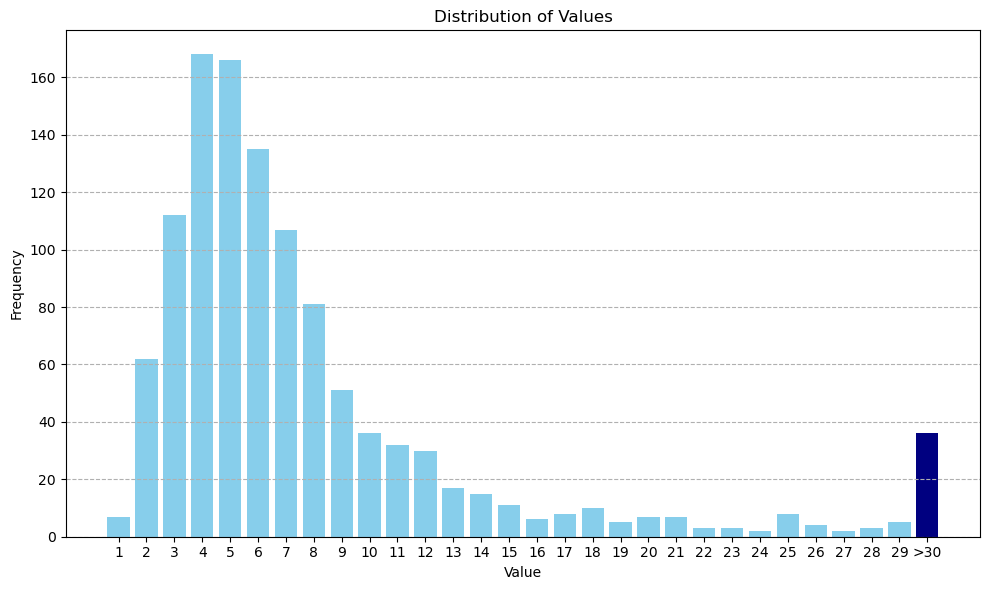

In [14]:

def plot_data_distribution(data, threshold=30):
    """
    Plots the distribution of given data with values above a specified threshold grouped together.
    Adds the count for each bar above it.

    Parameters:
    - data: Pandas Series or list-like object containing the data to plot.
    - threshold: The threshold value above which data points are grouped into a single category.
    """
    # Create a Counter to count the frequency of the data points
    data_frequency = Counter(data)

    # Group data points above the threshold
    grouped_data = {k: v for k, v in data_frequency.items() if k <= threshold}
    grouped_data[f'>{threshold}'] = sum(v for k, v in data_frequency.items() if k > threshold)

    # Sort the keys so that the '>threshold' group appears at the end
    sorted_keys = sorted([k for k in grouped_data if isinstance(k, int)]) + [f'>{threshold}']
    sorted_values = [grouped_data[k] for k in sorted_keys]

    # Determine colors for each bar
    colors = ['skyblue' if k != f'>{threshold}' else 'navy' for k in sorted_keys]

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(sorted_keys)), sorted_values, color=colors)

    # Adding labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Values')
    plt.xticks(range(len(sorted_keys)), labels=sorted_keys)

    # Adding grid and layout adjustment
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # Display the plot
    plt.show()


total_authors = merged_df['Gender_Counts'].apply(lambda x: sum(x.values()))
plot_data_distribution(total_authors, threshold=30)



C:\Users\maria\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


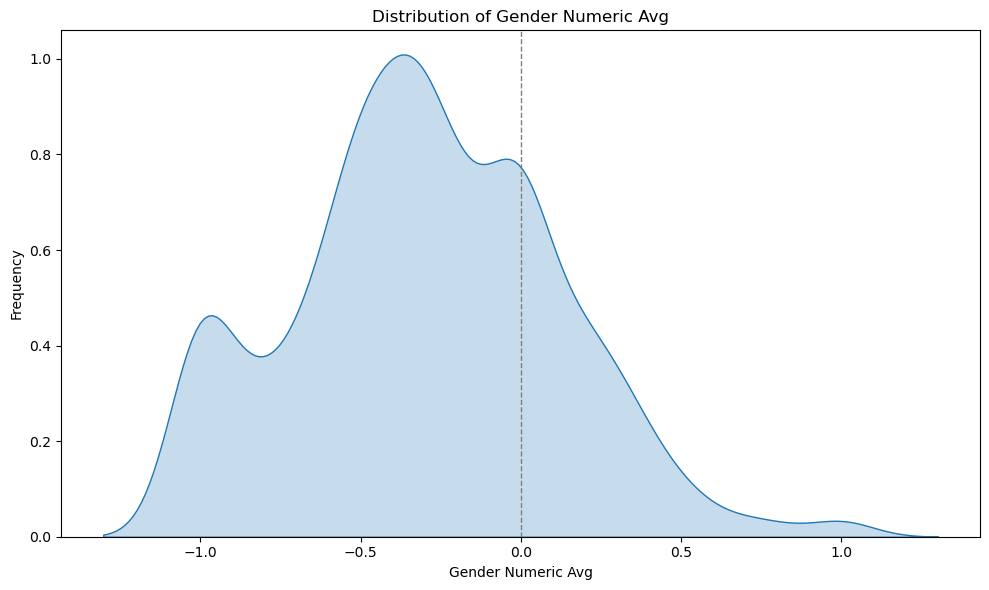

In [15]:
# Gender_Numeric_Avg
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='Gender_Numeric_Avg', fill=True)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.title('Distribution of Gender Numeric Avg')
plt.xlabel('Gender Numeric Avg')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

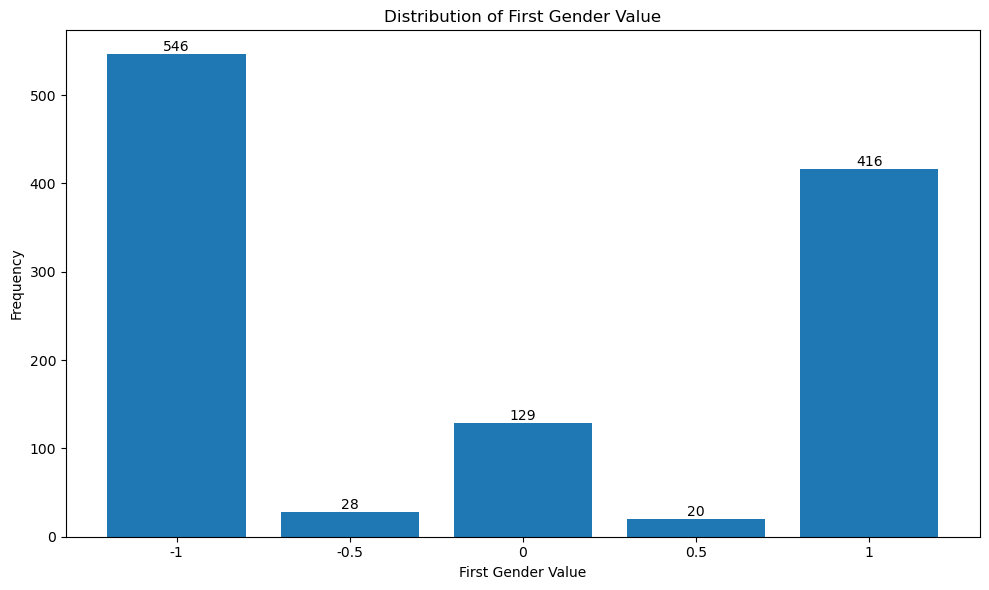

In [16]:
# First_Gender_Value
bins = np.array([-1, -0.5, 0, 0.5, 1])
labels = np.digitize(merged_df['First_Gender_Value'], bins) - 1
counts = np.bincount(labels, minlength=len(bins)-1)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(counts)), counts)
    
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), f'{int(bar.get_height())}',
                ha='center', va='bottom')

plt.title('Distribution of First Gender Value')
plt.xticks(range(len(counts)), labels=['-1', '-0.5', '0', '0.5', '1'])
plt.xlabel('First Gender Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Entities - Counting

In [17]:
'''# Function to flatten a list of lists (after converting from string representation) --> Functioin thought for handling the TaxRef multi-entity returns
def flatten_list_of_lists(row):
    # Convert the string representation to actual list
    #lists = ast.literal_eval(row) #string_to_list(row)
    # Flatten the list of lists
    flattened = [(taxref, name) for sublist in row for (taxref, name, _) in sublist]
    return flattened


def count_unique_entities_per_row_and_sort(entities_column):
    """
    Receives a pandas Series where each row contains a list or a string representation of a list of entities.
    Returns a pandas Series where each row contains an OrderedDict with the count of unique entities or tuples,
    sorted by their counts in descending order. It handles case insensitivity for strings and maintains the integrity of tuples.
    """
    def count_entities(row_entities):
        try:
            if isinstance(row_entities, str):
                # Safely convert string representation to actual list
                row_entities = ast.literal_eval(row_entities)

            row_entities_list = []
            for entity in row_entities:
                if isinstance(entity, tuple):
                    # Handle tuples by keeping them intact
                    row_entities_list.append(entity)
                elif isinstance(entity, str):
                    # Convert strings to lowercase for case insensitivity
                    row_entities_list.append(entity.lower())
                else:
                    # Ignore non-string, non-tuple entities
                    continue

            # Count entities/tuples and sort them
            entity_counter = Counter(row_entities_list)
            sorted_entities = dict(sorted(entity_counter.items(), key=lambda x: x[1], reverse=True))

            return sorted_entities
        except Exception as e:
            print(f"Error processing row: {e}")
            return {}

    # Apply the count_entities function to each row in the entities_column
    return entities_column.apply(count_entities)

count_unique_entities_per_row_and_sort(merged_df['TaxoEntitiesMD2_GBIF'])'''

'# Function to flatten a list of lists (after converting from string representation) --> Functioin thought for handling the TaxRef multi-entity returns\ndef flatten_list_of_lists(row):\n    # Convert the string representation to actual list\n    #lists = ast.literal_eval(row) #string_to_list(row)\n    # Flatten the list of lists\n    flattened = [(taxref, name) for sublist in row for (taxref, name, _) in sublist]\n    return flattened\n\n\ndef count_unique_entities_per_row_and_sort(entities_column):\n    """\n    Receives a pandas Series where each row contains a list or a string representation of a list of entities.\n    Returns a pandas Series where each row contains an OrderedDict with the count of unique entities or tuples,\n    sorted by their counts in descending order. It handles case insensitivity for strings and maintains the integrity of tuples.\n    """\n    def count_entities(row_entities):\n        try:\n            if isinstance(row_entities, str):\n                # Safe

In [18]:
type(merged_df['TaxoEntitiesMD2_GBIF'])

pandas.core.series.Series

In [19]:
merged_df['TaxoEntitiesMD2_GBIF'].iloc[0]

"[[('GBIF:3183002', 'clove', 0.7634411454200745)], [('GBIF:3183002', 'Syzygium aromaticum', 1.0)], [('GBIF:3075433', 'pepper', 1.0), ('GBIF:2932937', 'pepper', 1.0), ('GBIF:3086347', 'pepper', 1.0), ('GBIF:3086351', 'pepper', 1.0), ('GBIF:3086324', 'pepper', 1.0)], [('GBIF:3060998', 'cassava', 1.0), ('GBIF:4930703', 'cassava', 1.0)], [('GBIF:2436436', 'Humans', 1.0)], [('GBIF:9512109', 'Ceraclea ambany', 0.7442896366119385)], [('GBIF:3183002', 'clove', 0.7634411454200745)], [('GBIF:3183002', 'clove', 0.7634411454200745)], [('GBIF:4801207', 'Bamboosiella', 0.7778515219688416)], [('GBIF:5014', 'Myrtaceae', 1.0)], [('GBIF:5386', 'Fabaceae', 1.0)], [('GBIF:6640', 'Moraceae', 1.0)], [('GBIF:2396', 'Rutaceae', 1.0)], [('GBIF:2984565', 'Artocarpus heterophyllus', 0.9999999403953552)], [('GBIF:3190002', 'Litchi chinensis', 1.0)], [('GBIF:2984573', 'Artocarpus altilis', 1.0), ('GBIF:8032558', 'Artocarpus altilis', 1.0)], [('GBIF:2762752', 'banana', 1.0), ('GBIF:2762950', 'banana', 1.0), ('GBIF:

In [20]:
def safe_flatten_and_count(row):
    try:
        # Assuming the row is a properly formatted string list of lists
        evaluated_row = ast.literal_eval(row)
        flattened = [item[1] for sublist in evaluated_row for item in sublist]
        return Counter(flattened)
    except ValueError:
        # Handle or log the error as appropriate
        return Counter()

# Apply this function to the 'TaxoEntitiesMD2_GBIF' column
# This assumes the rest of your DataFrame manipulation has worked as expected
merged_df['TaxoEntities_Count'] = merged_df['TaxoEntitiesMD2_GBIF'].apply(safe_flatten_and_count)
print(merged_df['TaxoEntities_Count'].iloc[0])

Counter({'banana': 35, 'clove': 11, 'Gliricidia sepium': 9, 'cassava': 8, 'pepper': 5, 'grass': 5, 'lychee': 4, 'Ficus ficus': 3, 'chestnut': 3, 'Olivieria': 3, 'Poria geoderma': 3, 'Artocarpus altilis': 2, 'Coffea canephora': 2, 'Vanilla planifolia': 2, 'coconut palm': 2, 'Pachira aquatica': 2, 'ma bamboo': 2, 'Ravenala madagascariensis': 2, 'Pallium Schröter, 1802': 2, 'Syzygium aromaticum': 1, 'Humans': 1, 'Ceraclea ambany': 1, 'Bamboosiella': 1, 'Myrtaceae': 1, 'Fabaceae': 1, 'Moraceae': 1, 'Rutaceae': 1, 'Artocarpus heterophyllus': 1, 'Litchi chinensis': 1, 'Musa': 1, 'Mafana': 1, 'Dioscorea': 1, 'Manihot esculenta': 1, 'Cocos nucifera': 1, 'Albizia stipulata': 1, 'Raphia farinifera': 1, 'Grevillea banksii': 1, 'Vanilla': 1, 'Camponotus bevohitra': 1, 'Mucha': 1})


In [21]:
'''from ast import literal_eval
from collections import Counter

def safe_flatten_and_count_taxoreference(row):
    # One taxoref seems to have multiple names so we are counting by name an not by taxoref
    
    try:
        # Safely evaluate the row to convert it from a string representation to a list of lists of tuples
        evaluated_row = literal_eval(row)
        # Flatten the list and extract only the taxoreference from each tuple
        taxoreferences = [item[1] for sublist in evaluated_row for item in sublist]
        # Count occurrences of each unique taxoreference
        return Counter(taxoreferences)
    except ValueError as e:
        # Handle or log the error as appropriate
        print(f"Error processing row: {e}")
        return Counter()

# Assuming merged_df is your DataFrame and 'TaxoEntitiesMD2_GBIF' contains the string representations
merged_df['TaxoEntities_Taxoreference_Count'] = merged_df['TaxoEntitiesMD2_GBIF'].apply(safe_flatten_and_count_taxoreference)
'''


'from ast import literal_eval\nfrom collections import Counter\n\ndef safe_flatten_and_count_taxoreference(row):\n    # One taxoref seems to have multiple names so we are counting by name an not by taxoref\n    \n    try:\n        # Safely evaluate the row to convert it from a string representation to a list of lists of tuples\n        evaluated_row = literal_eval(row)\n        # Flatten the list and extract only the taxoreference from each tuple\n        taxoreferences = [item[1] for sublist in evaluated_row for item in sublist]\n        # Count occurrences of each unique taxoreference\n        return Counter(taxoreferences)\n    except ValueError as e:\n        # Handle or log the error as appropriate\n        print(f"Error processing row: {e}")\n        return Counter()\n\n# Assuming merged_df is your DataFrame and \'TaxoEntitiesMD2_GBIF\' contains the string representations\nmerged_df[\'TaxoEntities_Taxoreference_Count\'] = merged_df[\'TaxoEntitiesMD2_GBIF\'].apply(safe_flatten_and

In [22]:
print(merged_df['TaxoEntities_Count'].iloc[0])


Counter({'banana': 35, 'clove': 11, 'Gliricidia sepium': 9, 'cassava': 8, 'pepper': 5, 'grass': 5, 'lychee': 4, 'Ficus ficus': 3, 'chestnut': 3, 'Olivieria': 3, 'Poria geoderma': 3, 'Artocarpus altilis': 2, 'Coffea canephora': 2, 'Vanilla planifolia': 2, 'coconut palm': 2, 'Pachira aquatica': 2, 'ma bamboo': 2, 'Ravenala madagascariensis': 2, 'Pallium Schröter, 1802': 2, 'Syzygium aromaticum': 1, 'Humans': 1, 'Ceraclea ambany': 1, 'Bamboosiella': 1, 'Myrtaceae': 1, 'Fabaceae': 1, 'Moraceae': 1, 'Rutaceae': 1, 'Artocarpus heterophyllus': 1, 'Litchi chinensis': 1, 'Musa': 1, 'Mafana': 1, 'Dioscorea': 1, 'Manihot esculenta': 1, 'Cocos nucifera': 1, 'Albizia stipulata': 1, 'Raphia farinifera': 1, 'Grevillea banksii': 1, 'Vanilla': 1, 'Camponotus bevohitra': 1, 'Mucha': 1})


In [23]:
type(merged_df['TaxoEntities_Count'].iloc[16])

collections.Counter

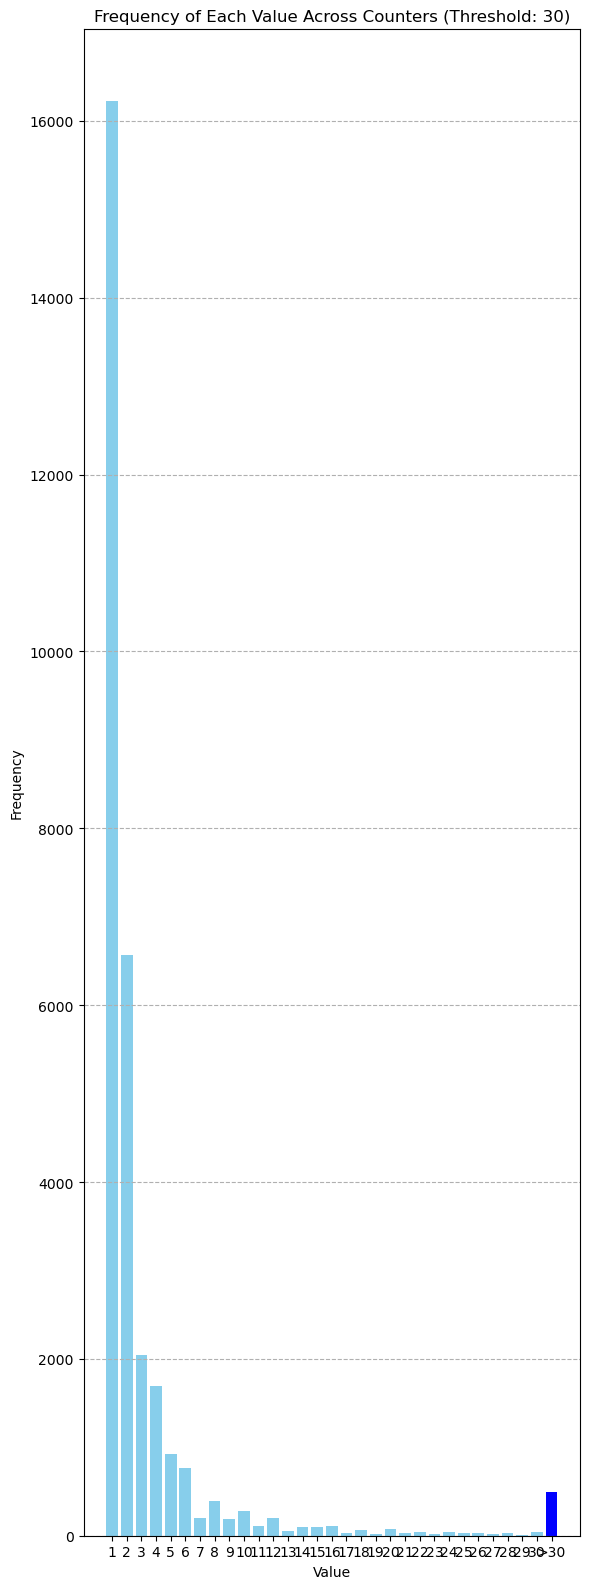

In [24]:


# Define the threshold value
threshold = 30

# Simulating the example DataFrame column with a list of Counter objects
counters_list = merged_df['TaxoEntities_Count'].tolist()

# Create a Counter to count the frequency of values
value_frequency = Counter()

for counter in counters_list:
    for value in counter.values():
        value_frequency[value] += 1

# Group counts above the threshold
grouped_values = {k: v for k, v in value_frequency.items() if k <= threshold}
grouped_values[f'>{threshold}'] = sum(v for k, v in value_frequency.items() if k > threshold)

# Sort the keys so that the '>threshold' group appears at the end
sorted_keys = sorted([k for k in grouped_values if isinstance(k, int)]) + [f'>{threshold}']
sorted_values = [grouped_values[k] for k in sorted_keys]

# Determine colors for each bar
colors = ['skyblue' if k != f'>{threshold}' else 'blue' for k in sorted_keys]

plt.figure(figsize=(6, 16))
plt.bar(range(len(sorted_keys)), sorted_values, color=colors)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Frequency of Each Value Across Counters (Threshold: {threshold})')
plt.xticks(range(len(sorted_keys)), labels=sorted_keys)

plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()


In [25]:

# Flatten all counts into a single list
all_counts = [count for counter in counters_list for count in counter.values()]

# Count the frequency of each count
frequency_of_counts = Counter(all_counts)

# Now, frequency_of_counts is a Counter where each key is a count from the original Counters,
# and each value is how many times that count occurred across all Counters.

# Example: How many times a frequency of 1 occurred
print(f"Frequency of 1: {frequency_of_counts[1]}")
print(frequency_of_counts)
# To print more statistics like maximum frequency, minimum frequency, etc.
max_frequency = max(frequency_of_counts.values())
min_frequency = min(frequency_of_counts.values())
num_counts = sum(frequency_of_counts.values())
average_frequency = statistics.mean(frequency_of_counts.keys())
num_unique_frequencies = len(frequency_of_counts)

print(f"Maximum frequency: {max_frequency}")
print(f"Minimum frequency: {min_frequency}")
print(f"Total number of counts (instances of frequencies): {num_counts}")
print(f"Average frequency: {average_frequency:.2f}")
print(f"Number of unique frequencies: {num_unique_frequencies}")


# Assuming counters_list is your list of Counter objects
# Aggregate all Counter objects into a single Counter
aggregated_counter = sum(counters_list, Counter())

# Find the most common element and its count
most_common_element, highest_count = aggregated_counter.most_common(1)[0]

print(f"The element with the highest count: {most_common_element} (Count: {highest_count})")

# Flatten all counts into a single list
all_counts = [count for counter in counters_list for count in counter.values()]

# Count the frequencies of each count
frequency_of_counts = Counter(all_counts)

# Find the count with the highest frequency
highest_frequency_count, highest_frequency = frequency_of_counts.most_common(1)[0]

print(f"The count with the highest frequency of occurrence: {highest_frequency_count} (Frequency: {highest_frequency})")
total_counter = sum(merged_df['TaxoEntities_Count'], Counter())
highest_counts = total_counter.most_common(10)
highest_counts

Frequency of 1: 16224
Counter({1: 16224, 2: 6567, 3: 2046, 4: 1697, 5: 924, 6: 766, 8: 390, 10: 276, 7: 200, 12: 196, 9: 192, 16: 107, 11: 105, 14: 104, 15: 96, 20: 79, 18: 60, 13: 52, 22: 43, 24: 41, 30: 40, 26: 33, 28: 32, 17: 32, 25: 31, 21: 27, 23: 22, 19: 21, 34: 20, 27: 20, 48: 19, 32: 19, 33: 18, 36: 17, 42: 17, 52: 15, 38: 15, 31: 14, 40: 14, 46: 14, 44: 14, 39: 13, 50: 12, 54: 12, 29: 11, 35: 10, 55: 10, 51: 9, 66: 8, 56: 8, 57: 7, 43: 7, 62: 7, 37: 7, 41: 6, 45: 6, 60: 6, 78: 6, 75: 6, 53: 5, 88: 5, 72: 5, 47: 5, 70: 5, 49: 5, 65: 4, 58: 4, 64: 4, 100: 4, 96: 4, 74: 4, 84: 3, 94: 3, 76: 3, 102: 3, 69: 3, 150: 3, 85: 3, 79: 3, 80: 3, 63: 3, 68: 3, 160: 2, 118: 2, 184: 2, 89: 2, 61: 2, 82: 2, 71: 2, 90: 2, 87: 2, 210: 2, 112: 2, 59: 2, 176: 2, 114: 2, 67: 2, 86: 2, 125: 2, 152: 1, 110: 1, 436: 1, 145: 1, 108: 1, 93: 1, 105: 1, 124: 1, 115: 1, 405: 1, 288: 1, 177: 1, 148: 1, 111: 1, 129: 1, 206: 1, 244: 1, 98: 1, 83: 1, 104: 1, 92: 1, 97: 1, 81: 1, 116: 1, 136: 1, 340: 1, 141: 1

[('Blue Tit', 822),
 ('Aphids', 804),
 ('aphid', 706),
 ('Diptera', 684),
 ('grass', 670),
 ('Coleoptera', 618),
 ('Zostera marina', 592),
 ('Sea bass', 585),
 ('Roe deer', 573),
 ('Paramecium', 564)]

In [26]:
desired_count = 436
elements_with_desired_count = []

for counter in counters_list:
    # Iterate through each counter's items (key-value pairs)
    for element, count in counter.items():
        # Check if the count matches the desired count
        if count == desired_count:
            # If so, add the element's name to the list
            elements_with_desired_count.append(element)

# Remove duplicates if any element appears in more than one counter with the desired count
unique_elements_with_desired_count = list(set(elements_with_desired_count))

print("Elements with a count of 436:", unique_elements_with_desired_count)
for index, row in merged_df.iterrows():
    # Retrieve the Counter for the current row
    current_counter = row['TaxoEntities_Count']
    
    # Check if any element in the current Counter has the desired count
    if any(count == desired_count for count in current_counter.values()):
        # If found, print the full content of the row
        print(f"Row with a Counter containing the count {desired_count}:")
        print(row)
        print("\n---\n")  # Print a separator for readability

Elements with a count of 436: ['Zostera marina']
Row with a Counter containing the count 436:
title_s                 ['Drivers and limits of phenotypic responses i...
journalTitle_s                                         Journal of Ecology
authLastName_s          ['Boyé', 'Becheler', 'Gauthier', 'Le Garrec', ...
authFullName_s          ['Aurélien Boyé', 'Ronan Becheler', 'Olivier G...
abstract_s                                                            NaN
fileMain_s                https://hal.univ-brest.fr/hal-03432469/document
ePublicationDateY_i                                                2021.0
Complete                                                             True
Genders                      [male, male, male, male, male, female, male]
unknownGenders                                                        0.0
content_text            HAL Id: hal-03432469 https://hal.univ-brest.fr...
cleaned_content_text    httpshalunivbrestfrhal apr multidisciplinary o...
contentLen        

In [27]:
type(merged_df['TopicsLDA'].iloc[16])

str

In [28]:
type(merged_df['Chunks_BERTopics'].iloc[16])

str

# Networks Construction
## Entity-Entity

In [29]:
#----FUNCTIONS USED

#------Functions to build graphs
def build_graph_entities(df, threshold, min_edge_weight=4):
    # Filter entities per row and prepare data for graph nodes and edges
    entity_counts = Counter()
    entity_gender_values = defaultdict(list)
    entity_gender_values_team = defaultdict(list)
    entity_documents = defaultdict(list)
    
    total_rows = len(df)
    
    # Filter out entities below the threshold per row
    df['Filtered_Entities'] = df['TaxoEntities_Count'].apply(lambda x: {k: v for k, v in x.items() if v >= threshold})
    
    # Calculate total counts and average gender values for each entity
    for index, row in df.iterrows():
        entities = row['Filtered_Entities']
        entity_counts.update(entities)
        
        for entity in entities:
            entity_gender_values[entity].append(row['First_Gender_Value'])
            entity_gender_values_team[entity].append(row['Gender_Numeric_Avg'])
            entity_documents[entity].append(index)
    
    # Calculate average gender values
    entity_avg_gender = {entity: np.mean(values) for entity, values in entity_gender_values.items() if entity in entity_counts}
    entity_avg_gender_team = {entity: np.mean(values) for entity, values in entity_gender_values_team.items() if entity in entity_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for entity, count in entity_counts.items():
        if count >= threshold:  # Only add entities that meet the overall count threshold
            avg_gender_value = entity_avg_gender.get(entity, 0)
            avg_gender_team_value = entity_avg_gender_team.get(entity, 0)
            
            # Calculate weighted gender scores
            weighted_gender_score = (count / total_rows) * avg_gender_value
            weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
            color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
            border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
            # Document count and list of documents using index
            document_list = entity_documents[entity]
            document_count = len(document_list)
            
            # Add node with all attributes
            G.add_node(entity, size=count, color=color, border_color=border_color,
                       avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                       weighted_gender_score=weighted_gender_score,
                       weighted_gender_score_team=weighted_gender_score_team,
                       documents=document_list, document_count=document_count)


    # Connect nodes with edges
    for index, row in df.iterrows():
        entities = row['Filtered_Entities']
        for entity_a in entities:
            for entity_b in entities:
                if entity_a != entity_b:
                    if G.has_edge(entity_a, entity_b):
                        G[entity_a][entity_b]['weight'] += 1
                    else:
                        G.add_edge(entity_a, entity_b, weight=1)
    
    
    
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)

    
    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=[data['size'] for _, data in G.nodes(data=True)],
                           node_color=[data['color'] for _, data in G.nodes(data=True)],
                           edgecolors=[data['border_color'] for _, data in G.nodes(data=True)], linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

#-----Functions to calculate meassures
def calculate_clustering_measures_communities(original_graph, input_communities_or_subgraphs):
    
    data_for_df = []
    total_edges = original_graph.number_of_edges()
    total_nodes = original_graph.number_of_nodes()

    # Determine if input is a list of communities or a dictionary of subgraphs
    if isinstance(input_communities_or_subgraphs, list):
        community_list = input_communities_or_subgraphs
        use_as_communities = True
    elif isinstance(input_communities_or_subgraphs, dict):
        community_list = list(input_communities_or_subgraphs.values())
        use_as_communities = False
    else:
        raise ValueError("Input must be either a list of communities or a dictionary with node lists")

    for i, nodes in enumerate(community_list):
        subgraph = original_graph.subgraph(nodes)
        num_nodes = subgraph.number_of_nodes()
        internal_edges = subgraph.number_of_edges()
        external_edges = sum(1 for u, v in original_graph.edges() if (u in subgraph and v not in subgraph) or (u not in subgraph and v in subgraph))

        internal_density = (2 * internal_edges) / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0
        possible_external_links = num_nodes * (total_nodes - num_nodes)
        external_density = external_edges / possible_external_links if possible_external_links > 0 else 0
        community_modularity = modularity(original_graph, [nodes] if use_as_communities else [set(subgraph.nodes()), set(original_graph.nodes()) - set(subgraph.nodes())])
        conductance = external_edges / (internal_edges + external_edges) if (internal_edges + external_edges) > 0 else 0
        clustering_coefficient = nx.average_clustering(subgraph)

        data_for_df.append({
            'Number of Nodes': num_nodes,
            'Number of Edges': internal_edges,
            'Internal Density': internal_density,
            'External Density': external_density,
            'Graph Cut': external_edges,
            'Modularity Score': community_modularity,
            'Conductance': conductance,
            'Clustering Coefficient': clustering_coefficient
        })

    df = pd.DataFrame(data_for_df)
    clustering_meassures_summary = df.describe().drop(['count', '25%', '50%', '75%', 'std'])  # simplified statistical summary
    clustering_meassures = data_for_df
    return clustering_meassures, clustering_meassures_summary

def get_subgraphs_clustering_measures(original_graph, subgraph):
    from scipy.stats import mode
    ''' Function to display clustering measures values of communities or subgraphs'''
    results = {}
    data_for_df = []
    total_edges = original_graph.number_of_edges()
    total_nodes = original_graph.number_of_nodes()

    if isinstance(subgraph, list):
        community_list = subgraph
        use_as_communities = True
    elif isinstance(subgraph, dict):
        community_list = list(subgraph.values())
        use_as_communities = False
    else:
        raise ValueError("Input must be either a list of communities or a dictionary with node lists")

    for i, nodes in enumerate(community_list):
        subgraph = original_graph.subgraph(nodes)
        num_nodes = subgraph.number_of_nodes()
        internal_edges = subgraph.number_of_edges()
        external_edges = sum(1 for u, v in original_graph.edges() if (u in subgraph and v not in subgraph) or (u not in subgraph and v in subgraph))

        # Calculations for each community or subgraph
        internal_density = (2 * internal_edges) / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0
        possible_external_links = num_nodes * (total_nodes - num_nodes)
        external_density = external_edges / possible_external_links if possible_external_links > 0 else 0

        if use_as_communities:
            community_modularity = modularity(original_graph, subgraph)
        else:
            rest_of_graph_nodes = set(original_graph.nodes()) - set(subgraph.nodes())
            community_modularity = modularity(original_graph, [set(subgraph.nodes()), rest_of_graph_nodes])
        conductance = external_edges / (internal_edges + external_edges) if (internal_edges + external_edges) > 0 else 0

        clustering_coefficient = nx.average_clustering(subgraph)

        data_for_df.append({
            'Number of Nodes': num_nodes,
            'Number of Edges': internal_edges,
            'Internal Density': internal_density,
            'External Density': external_density,
            'Graph Cut': external_edges,
            'Modularity Score': community_modularity,
            'Conductance': conductance,
            'Clustering Coefficient': clustering_coefficient
        })
        
        results[f'Subgraph {i}'] = data_for_df[-1]

    # DataFrame handling
    df = pd.DataFrame(data_for_df)
    numeric_df = df.select_dtypes(include=[np.number])
    summary_df = numeric_df.agg(['mean', 'max', 'min']).assign(
        Mode=lambda x: x.apply(lambda col: mode(col)[0][0] if len(mode(col)[0]) > 0 else None)
    )
    
    print(f'Subgraph clustering meassures {summary_df}')

    return results, summary_df


def calculate_centrality_measures(graph, name_complement=''):
    # Calculate Degree Centrality
    degree_centrality = nx.degree_centrality(graph)
    
    # Calculate Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)
    
    # Calculate Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)
    
    # Calculate Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)
    
    # Calculate neighborhood connectivity
    neighborhood_connectivity = {}
    male_neighbors = {}
    female_neighbors = {}
    neutral_neighbors = {}
    
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        neighbor_degrees = [graph.degree(neighbor) for neighbor in neighbors]
        
        # Neighborhood Connectivity
        if neighbors:  # avoid division by zero
            neighborhood_connectivity[node] = sum(neighbor_degrees) / len(neighbor_degrees)
        else:
            neighborhood_connectivity[node] = 0

        # Calculate the percentage of male, female, and neutral neighbors
        male_count = sum(1 for n in neighbors if graph.nodes[n].get('avg_gender', 0) <= -0.5)
        female_count = sum(1 for n in neighbors if graph.nodes[n].get('avg_gender', 0) >= 0.5)
        neutral_count = sum(1 for n in neighbors if -0.5 < graph.nodes[n].get('avg_gender', 0) < 0.5)
        
        total_neighbors = len(neighbors) if neighbors else 1  # avoid division by zero
        
        male_neighbors[node] = male_count / total_neighbors
        female_neighbors[node] = female_count / total_neighbors
        neutral_neighbors[node] = neutral_count / total_neighbors
    
    # Add centrality measures and neighbor percentages as node attributes
    nx.set_node_attributes(graph, degree_centrality, f'{name_complement}degree_centrality')
    nx.set_node_attributes(graph, betweenness_centrality, f'{name_complement}betweenness_centrality')
    nx.set_node_attributes(graph, closeness_centrality, f'{name_complement}closeness_centrality')
    nx.set_node_attributes(graph, eigenvector_centrality, f'{name_complement}eigenvector_centrality')
    nx.set_node_attributes(graph, neighborhood_connectivity, f'{name_complement}neighborhood_connectivity')
    nx.set_node_attributes(graph, male_neighbors, f'{name_complement}male_neighbors')
    nx.set_node_attributes(graph, female_neighbors, f'{name_complement}female_neighbors')
    nx.set_node_attributes(graph, neutral_neighbors, f'{name_complement}neutral_neighbors')

    print("Centrality measures and neighborhood attributes added to nodes.")
    return graph





def explore_graph(graph):
    ''' Function to display centrality values, correlations of node attributes, and plot a heatmap.'''
    from scipy.stats import mode, pearsonr

   
    # Prepare a dictionary to store the attribute data
    attributes_data = {}

    print(f"Total number of nodes: {graph.number_of_nodes()}")
    print(f"Total number of edges: {graph.number_of_edges()}")

    # Collect data for each node in the graph
    for node, data in graph.nodes(data=True):
        for attr, value in data.items():
            # Check if the value is numeric; if not, print a warning and the offending data
            if isinstance(value, (int, float, np.number)):
                if attr not in attributes_data:
                    attributes_data[attr] = []
                attributes_data[attr].append(value)
            #else:
                #print(f"Non-numeric data detected: Node {node}, Attribute {attr}, Value {value}")

    # Ensure all attributes are numeric for centrality measures
    if 'degree_centrality' not in attributes_data:
        attributes_data['degree_centrality'] = list(nx.degree_centrality(graph).values())
    if 'betweenness_centrality' not in attributes_data:
        attributes_data['betweenness_centrality'] = list(nx.betweenness_centrality(graph).values())
    if 'closeness_centrality' not in attributes_data:
        attributes_data['closeness_centrality'] = list(nx.closeness_centrality(graph).values())

    # Convert attributes_data to DataFrame for easier manipulation
    attribute_df = pd.DataFrame(attributes_data)

    # Calculate statistical measures for each attribute
    stats_data = {}
    for attr, values in attribute_df.iteritems():
        stats_data[attr] = {
            'Max': np.max(values),
            'Min': np.min(values),
            'Average': np.mean(values),
            'Mode': mode(values).mode[0] if len(mode(values).mode) > 0 else None
        }

    # Convert the stats data into a DataFrame
    stats_df = pd.DataFrame(stats_data).transpose()
    stats_df.columns = ['Max', 'Min', 'Average', 'Mode']

    # Calculate the correlation matrix
    correlation_matrix = attribute_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Attribute Correlation Heatmap')
    plt.show()

    return stats_df, correlation_matrix




import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities, girvan_newman, k_clique_communities
import itertools

def detect_communities(G, method='louvain', community_parameter=3, graph_name='Entities'):
    '''
    Detect communities in a graph using specified method and update node attributes with their community membership.

    Args:
    G (Graph): A NetworkX graph.
    method (str): Method for community detection ('louvain', 'girvan_newman', 'k_clique').
    community_parameter (int): Parameter specific to the method:
        - For 'k_clique', it's the size of the smallest clique.
        - For 'girvan_newman', it's the number of splits.

    Returns:
    dict: A dictionary of communities with keys as community labels and values as lists of nodes.
    '''
    # Clear existing community data for this method
    nx.set_node_attributes(G, {method: []}, method)  # Resets the attribute for all nodes

    if method == 'louvain':
        communities = louvain_communities(G)
    elif method == 'girvan_newman':
        comp = girvan_newman(G)
        limited = itertools.islice(comp, community_parameter - 1)
        for communities in limited:
            pass
        communities = list(sorted(c) for c in communities)
    elif method == 'k_clique':
        communities = list(k_clique_communities(G, community_parameter))
        communities = [list(community) for community in communities]
    else:
        raise ValueError("Unsupported community detection method")

    community_nodes = {f"Community {i}": community for i, community in enumerate(communities)}

    # Annotate nodes with their communities
    for community_id, nodes in community_nodes.items():
        for node in nodes:
            if G.nodes[node].get(method):
                G.nodes[node][method] = [community_id]  # Replace with new community ID
            else:
                G.nodes[node][method] = [community_id]  # Initialize if not present

    # Create a color map for the communities
    community_colors = plt.get_cmap('viridis', len(communities))
    
    # Plot the graph with community coloring
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes with colors based on their community
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(
            G, pos, 
            nodelist=community, 
            node_color=[community_colors(i)]*len(community), 
            node_size=[G.nodes[node].get('size', 10) * 10 for node in community],
            alpha=0.7
        )
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    plt.title("Graph with Detected Communities")
    plt.axis('off')
    plt.show()
    
    plot_all_community_stats(G, community_nodes,  title_g=f'{graph_name} [{method}]')
    community_clustering_meassures, clustering_meassures_summary = calculate_clustering_measures_communities(G, community_nodes)
    
    print(f"Method {method} - Found {len(community_nodes)} communities: {community_nodes}")
    
    return community_nodes, community_clustering_meassures, clustering_meassures_summary



def analyze_multiple_community_methods(G, min_clique=3, gn_splits=3, graph_name='Entities'):
    '''
    Apply multiple community detection methods on a graph and compile their results.
    
    Args:
    G (Graph): A NetworkX graph.
    min_clique (int): Minimum size of the clique for the k-clique community detection.
    gn_splits (int): Number of splits for the Girvan-Newman method.
    graph_name (str): Name of the graph for titling purposes.

    Returns:
    Three dictionaries: 
    - dict of community nodes keyed by method,
    - dict of community clustering measures keyed by method,
    - dict of clustering measures summaries keyed by method.
    '''
    
    methods = ['louvain', 'girvan_newman', 'k_clique']
    community_nodes_dict = {}
    community_clustering_measures_dict = {}
    clustering_measures_summary_dict = {}

    for method in methods:
        community_parameter = min_clique if method != 'girvan_newman' else gn_splits
        community_nodes, community_clustering_measures, clustering_measures_summary = detect_communities(
            G, method, community_parameter, graph_name=graph_name
        )
        
        print(f'testing {community_clustering_measures}')
        community_nodes_dict[method] = community_nodes
        community_clustering_measures_dict[method] = community_clustering_measures
        clustering_measures_summary_dict[method] = clustering_measures_summary

    return community_nodes_dict, community_clustering_measures_dict, clustering_measures_summary_dict



#-----Functions to build graphs/subgraphs/communities

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np  # Necessary for calculations



def split_graph_by_gender(graph):
    subgraphs = {
        'men': nx.Graph(),
        'neutral': nx.Graph(),
        'women': nx.Graph()
    }
    
    # Add nodes with attributes based on gender
    for node, data in graph.nodes(data=True):
        avg_gender = data.get('avg_gender', 0)  # Default to 0 if not available
        target_subgraph = subgraphs['neutral']
        if avg_gender <= -0.5:
            target_subgraph = subgraphs['men']
        elif avg_gender >= 0.5:
            target_subgraph = subgraphs['women']
        target_subgraph.add_node(node, **data)
    
    # Add edges within each subgraph based on the original graph's edges
    for u, v, data in graph.edges(data=True):
        if u in subgraphs['men'] and v in subgraphs['men']:
            subgraphs['men'].add_edge(u, v, **data)
        elif u in subgraphs['neutral'] and v in subgraphs['neutral']:
            subgraphs['neutral'].add_edge(u, v, **data)
        elif u in subgraphs['women'] and v in subgraphs['women']:
            subgraphs['women'].add_edge(u, v, **data)
            
            
    # Dictionaries to hold the output
    subgraph_dict = {}
    stats_dict = {}
    correlation_matrix_dict = {}
    
    for gender, subgraph in subgraphs.items():
        subgraph = calculate_centrality_measures(subgraph, name_complement=f"{gender}_")
        plot_graph_with_attributes(subgraph, title=f"Graph Visualization for {gender.capitalize()}", top_labels=20)
        stats, correlation_matrix = explore_graph(subgraph)
        
        subgraph_dict[gender] = subgraph
        stats_dict[gender] = stats
        correlation_matrix_dict[gender] = correlation_matrix
    
    return subgraph_dict, stats_dict#, correlation_matrix_dict




#-----Functions for information display

def print_node_attributes(graph, node_name):
    # Check if the node exists in the graph
    if node_name in graph:
        # Retrieve and print all attributes of the node
        node_attributes = graph.nodes[node_name]
        print(f"Attributes for '{node_name}':")
        for attribute, value in node_attributes.items():
            print(f"  {attribute}: {value}")
    else:
        print(f"No node named '{node_name}' found in the graph.")



def plot_graph_with_attributes(graph, title='Graph Visualization', scale_node=2, top_labels=10, spacing_k = 0.15):
    plt.figure(figsize=(14, 10))  # Increased figure size for better visibility
    pos = nx.spring_layout(graph, k=spacing_k, iterations=50)  # Increased spacing and iterations for a better spread

    # Prepare a plot with an axis
    fig, ax = plt.subplots(figsize=(14, 10))  # Match subplot size to figure size for consistency
    
    # Draw nodes with size and color attributes
    node_sizes = [graph.nodes[node]['size'] * scale_node for node in graph.nodes()]  # Increased size scaling factor
    node_colors = [graph.nodes[node]['color'] for node in graph.nodes()]
    edge_colors = [graph.nodes[node]['border_color'] for node in graph.nodes()]

    # Draw nodes
    nodes = nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, edgecolors=edge_colors, linewidths=2, alpha=0.9, ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(graph, pos, width=1, alpha=0.4, ax=ax)  # Increased edge width for visibility
    
    # Draw labels for the top n largest nodes
    sorted_nodes = sorted(graph.nodes(data=True), key=lambda x: x[1]['size'], reverse=True)
    labels = {node[0]: node[0] for node in sorted_nodes[:top_labels]}
    nx.draw_networkx_labels(graph, pos, labels, font_size=10, ax=ax)  # Increased font size for labels
    
    # Create a color bar
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
    sm.set_array([])  # Necessary when only using colormap and not mappable data
    cbar = plt.colorbar(sm, orientation='horizontal', ax=ax, pad=0.1)
    cbar.set_label('Average Gender Value')

    plt.title(title)
    plt.axis('off')  # Hide the axes
    plt.show()
    
    
    
def plot_top_nodes(graph, attribute_name='size', top_n=20):
    from statistics import mode, StatisticsError
    # Ensure the graph has the specified attribute for nodes
    if not nx.get_node_attributes(graph, attribute_name):
        print(f"No '{attribute_name}' attribute found for nodes in the graph.")
        return

    # Extract attribute values and sort nodes by this attribute
    node_attributes = nx.get_node_attributes(graph, attribute_name)
    
    # Compute statistics for all nodes
    all_sizes = list(node_attributes.values())
    min_size = min(all_sizes)
    max_size = max(all_sizes)
    avg_size = np.mean(all_sizes)
    try:
        mode_size = mode(all_sizes)
    except StatisticsError:
        mode_size = "No unique mode"

    # Print global statistics
    print(f"Global Min size: {min_size}")
    print(f"Global Max size: {max_size}")
    print(f"Global Avg size: {avg_size}")
    print(f"Global Mode size: {mode_size}")
    
    
    top_nodes = sorted(node_attributes.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Print details of top nodes
    print("Top nodes by attribute:", attribute_name)
    for node, value in top_nodes:
        print(f"  {node}: {value}")

    # Create a subgraph of these top nodes
    top_graph = graph.subgraph([node for node, _ in top_nodes])

    # Normalize node sizes for visualization
    sizes = [value for _, value in top_nodes]
    min_size = min(sizes)
    max_size = max(sizes)
    scaled_sizes = [(size - min_size) / (max_size - min_size) * 900 + 100 for size in sizes]  # Scale from 100 to 1000

    # Layout and draw the subgraph
    pos = nx.spring_layout(top_graph, k=0.9, iterations=30)
    plt.figure(figsize=(12, 8))
    node_colors = [top_graph.nodes[node].get('color', 'blue') for node in top_graph.nodes()]
    edgecolors = [top_graph.nodes[node].get('border_color', 'black') for node in top_graph.nodes()]
    
    nodes = nx.draw_networkx_nodes(top_graph, pos, node_size=scaled_sizes, node_color=node_colors, edgecolors=edgecolors, linewidths=2, alpha=0.9)
    nx.draw_networkx_edges(top_graph, pos, alpha=0.2)
    nx.draw_networkx_labels(top_graph, pos, labels={node: node for node in top_graph.nodes()}, font_size=12)

    # Color bar setup
    norm = plt.Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
    cbar.set_label('Average Gender Score')

    plt.title(f"Top {top_n} Nodes by {attribute_name}")
    plt.axis('off')
    plt.show()
    
    

def plot_all_top_nodes(G, top_n=20):
    """Calls plot_top_nodes for multiple attributes and visualizes top nodes."""
    attributes = [
        'size', 'betweenness_centrality', 'closeness_centrality',
        'degree_centrality', 'eigenvector_centrality', 'neighborhood_connectivity'
    ]
    
    for attribute in attributes:
        print(f"Plotting top nodes for attribute: {attribute}")
        plot_top_nodes(G, attribute_name=attribute, top_n=top_n)

    
    
    
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_community_stats(graph, community_nodes, color_reference='avg_gender', min_community_size=0, show_labels=False, order_communities=False, title='Community Size and Avg Gender Value Distribution'):
    """
    Plot a scatter plot showing the size and average gender value of communities, derived from node attributes in a graph.

    Parameters:
    - graph: The graph object containing the nodes with their attributes.
    - community_nodes: A dictionary where keys are community identifiers and values are lists of node identifiers.
    - color_reference: The node attribute to use for coloring the nodes.
    - min_community_size: Minimum size of communities to be included in the plot.
    - show_labels: Boolean to decide whether to show labels or not.
    - order_communities: Boolean to decide whether to order the communities by size or not.
    """
    # Filter and optionally sort communities
    filtered_communities = {k: v for k, v in community_nodes.items() if len(v) >= min_community_size}
    if order_communities:
        sorted_communities = dict(sorted(filtered_communities.items(), key=lambda item: len(item[1]), reverse=True))
    else:
        sorted_communities = filtered_communities

    # Calculate sizes and average values from graph node attributes
    community_sizes = [len(nodes) for nodes in sorted_communities.values()]
    avg_community_values = [
        np.mean([graph.nodes[node][color_reference] for node in nodes if color_reference in graph.nodes[node]]) 
        for nodes in sorted_communities.values()
    ]
    
    # Normalize community sizes for bubble sizes and adjust font size
    community_sizes_normalized = [size * 10 for size in community_sizes]
    font_sizes = [np.sqrt(size) * 0.5 for size in community_sizes_normalized]  # Dynamic font size based on circle size

    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    ax.axhline(0, color='lightgrey', linestyle='--', linewidth=1, zorder=1)

    positions = np.arange(len(sorted_communities))
    scatter = ax.scatter(
        x=positions, 
        y=avg_community_values, 
        s=community_sizes_normalized,
        c=avg_community_values,
        cmap='coolwarm', 
        alpha=0.9, 
        edgecolor='black',
        vmin=-1.1, vmax=1.1,
        zorder=2
    )

    if show_labels:
        for i, community_id in enumerate(sorted_communities.keys()):
            simple_id = community_id.replace("Community", "").strip()
            ax.text(positions[i], avg_community_values[i], f"C{simple_id}", 
                    ha='center', va='center', zorder=3, color='black', fontsize=font_sizes[i]-3)

    plt.colorbar(scatter, label="Average Gender Value")
    plt.xticks([])
    plt.ylim(-1.2, 1.2)
    plt.xlabel('')
    plt.ylabel('Average Value')
    plt.title(f'{title} (Min Size: {min_community_size})')

    plt.tight_layout()
    plt.show()

def plot_all_community_stats(graph, community_nodes, min_community_size=2, show_labels=True, order_communities=False, title_g='Entities'):
    plot_community_stats(graph, community_nodes, color_reference='avg_gender', min_community_size=min_community_size, show_labels=show_labels,  title=f"COMMUNITIES: {title_g} [First Author]")
    plot_community_stats(graph, community_nodes, color_reference='avg_gender_team', min_community_size=min_community_size, show_labels=show_labels,  title=f"COMMUNITIES: {title_g} [Team]")



In [30]:
# Creating the graph
entities_G, stats_entities_G = build_graph_entities(merged_df, threshold=5, min_edge_weight=4 )

Centrality measures and neighborhood attributes added to nodes.
Total number of nodes: 2697
Total number of edges: 834


AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [ ]:
# Checking attributes added per node
print_node_attributes(entities_G, 'Blue Tit')

In [ ]:
# Dividing graph per gender predominance
subgraphs_genders, subgraph_centrality_stats = split_graph_by_gender(entities_G)


In [ ]:
subgraphs_genders

In [ ]:

subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(entities_G, subgraphs_genders)
subgraphs_clustering_summary_statistics


In [ ]:
subgraphs_centralities

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'Blue Tit')

In [ ]:
plot_all_top_nodes(entities_G, top_n=20)

In [ ]:
#Error to be fixed: division by zero
#plot_top_nodes(entities_G, attribute_name='female_neighbors', top_n=20)
#plot_top_nodes(entities_G, attribute_name='male_neighbors', top_n=20)
#plot_top_nodes(entities_G, attribute_name='neutral_neighbors', top_n=20)

# community_nodes, community_clustering_meassures, clustering_meassures_summary = detect_communities(entities_G)
#community_clustering_meassures, clustering_meassures_summary = calculate_clustering_measures_communities(entities_G, community_nodes)


In [ ]:
entities_communities, entities_clustering_measures, entities_clustering_measures_summary = analyze_multiple_community_methods(entities_G, min_clique=10, gn_splits = 3, graph_name='Entities')

In [ ]:
entities_communities

In [ ]:
entities_clustering_measures

In [ ]:
entities_clustering_measures_summary

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(entities_G, 'Herbivora')

In [ ]:
import networkx as nx
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from networkx.algorithms.community import greedy_modularity_communities

#Trying to get similarity among community detection algorithms

def compute_similarity(communities1, communities2):
    # Create labels from community data
    labels_true = create_labels_from_communities(communities1)
    labels_pred = create_labels_from_communities(communities2)
    
    # Compute NMI and ARI
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    ari = adjusted_rand_score(labels_true, labels_pred)
    
    return nmi, ari

def create_labels_from_communities(communities):
    label_dict = {}
    for idx, community in enumerate(communities):
        for node in community:
            label_dict[node] = idx
    # Ensure labels are in the order of nodes
    labels = [label_dict[node] for node in sorted(label_dict)]
    return labels

# Assuming communities from multiple methods are stored in a dictionary `community_results`
community_methods = list(entities_community_results.keys())
for i in range(len(community_methods)):
    for j in range(i + 1, len(community_methods)):
        method1, method2 = community_methods[i], community_methods[j]
        communities1 = [set(comm) for comm in entities_community_results[method1].values()]
        communities2 = [set(comm) for comm in entities_community_results[method2].values()]
        nmi, ari = compute_similarity(communities1, communities2)
        print(f"Similarity between {method1} and {method2}: NMI = {nmi:.2f}, ARI = {ari:.2f}")


In [ ]:
test_community = entities_communities['louvain']['Community 97']
test_community

In [ ]:
subG = entities_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

In [ ]:
test_community = entities_communities['k_clique']['Community 1']
subG = entities_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)
test_community

## Document-entity-Document

In [ ]:
def build_graph_DED(df, entity_count_threshold = 4, min_edge_weight=0):
    '''Build (Doc) - ent - (Doc) based on dataframe
    '''
    G = nx.Graph()  # Initialize an undirected graph
    
    # Filter out entities below the threshold per row and track documents
    df['Filtered_Entities'] = df.apply(lambda row: {k: v for k, v in row['TaxoEntities_Count'].items() if v >= threshold}, axis=1)
    
    
    # Add nodes with attributes
    for index, row in df.iterrows():
        avg_gender = row['First_Gender_Value']
        avg_gender_team = row['Gender_Numeric_Avg']
        entity_count = len(row['Filtered_Entities'])  # Number of entities mentioned above threshold
        entity_list = list(row['Filtered_Entities'].keys())  # List of entities mentioned
        color = plt.cm.coolwarm((avg_gender + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team + 1) / 2)
        
        G.add_node(index, title = row['title_s'], size=row['numChunks'], avg_gender=avg_gender, 
                   avg_gender_team=avg_gender_team, entities=entity_list, 
                   entity_count=entity_count, color = color, border_color=border_color)
    
    # Mapping entities to documents
    entity_to_docs = defaultdict(list)
    for index, row in df.iterrows():
        for entity in row['Filtered_Entities']:
            entity_to_docs[entity].append(index)
    
    # Add edges
    for entity, docs in entity_to_docs.items():
        for doc1, doc2 in combinations(docs, 2):
            if G.has_edge(doc1, doc2):
                G[doc1][doc2]['weight'] += 1
            else:
                G.add_edge(doc1, doc2, weight=1)
                
                
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)
    
    
    
    # Plotting
    plt.figure(figsize=(15, 10))
    pos = nx.kamada_kawai_layout(G)  # Using an alternative layout
    
    # Determine edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Labels for top weighted edges
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get top 10 edges by weight
    edge_labels = {edge: weight for edge, weight in top_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    
    # Draw nodes with size and color attributes
    node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Adjust size scaling for better visibility
    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes]  # Color by average gender value
    
    # Create a scatter plot for nodes
    scatter = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='coolwarm', alpha=0.7, edgecolors='black')
    
    # Draw edges with width proportional to weight
    edge_widths = [d['weight'] * 0.5 for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)


    
    plt.colorbar(scatter, label='Average Gender Value')
    
    plt.title("Document Similarity Graph")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Example usage
# Ensure your 'merged_df' DataFrame is properly defined with 'title_s' and 'Filtered_Entities' columns
ded_G, stats_ded_G = build_graph_DED(merged_df)
stats_ded_G

In [ ]:
print_node_attributes(ded_G, 12)

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(ded_G)
stats_genders


In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(ded_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['men'], 696)

In [ ]:
plot_all_top_nodes(ded_G, top_n=20)

In [ ]:
ded_communities, ded_clustering_measures, ded_clustering_measures_summary = analyze_multiple_community_methods(ded_G, min_clique=10, gn_splits = 3, graph_name='DeD')


In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(ded_G, 696)

In [ ]:
# Creating the subgraph
test_community = ded_communities['louvain']['Community 86']
subG = ded_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

# TdT Network
(Topic) - doc - (Topic)

In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(merged_df, threshold=0.1):
    topic_counts = Counter()
    topic_gender_values = defaultdict(list)
    topic_gender_values_team = defaultdict(list)
    topic_documents = defaultdict(list)
    
    total_rows = len(df)
    
    # Calculate total counts and average gender values for each topic
    for index, row in df.iterrows():
        topics = row['Parsed_TopicsLDA']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        topic_counts.update(filtered_topics)
        
        for topic in filtered_topics:
            topic_gender_values[topic].append(row['First_Gender_Value'])
            topic_gender_values_team[topic].append(row['Gender_Numeric_Avg'])
            topic_documents[topic].append(index)
    
    
    # Calculate average gender values
    topic_avg_gender = {topic: np.mean(values) for topic, values in topic_gender_values.items() if topic in topic_counts}
    topic_avg_gender_team = {topic: np.mean(values) for topic, values in topic_gender_values_team.items() if topic in topic_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for topic, count in topic_counts.items():
        avg_gender_value = topic_avg_gender.get(topic, 0)
        avg_gender_team_value = topic_avg_gender_team.get(topic, 0)
            
        # Calculate weighted gender scores
        weighted_gender_score = (count / total_rows) * avg_gender_value
        weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
        color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
        # Document count and list of documents using index
        document_list = topic_documents[topic]
        document_count = len(document_list)
            
        # Add node with all attributes
        G.add_node(topic, size=count, color=color, border_color=border_color,
                   avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                   weighted_gender_score=weighted_gender_score,
                    weighted_gender_score_team=weighted_gender_score_team,
                   documents=document_list, document_count=document_count)

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in merged_df.iterrows():
        topics = row['Parsed_TopicsLDA']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        
        for topic in filtered_topics:
            # Initialize node if it does not exist
            if topic not in G:
                G.add_node(topic, size=0, avg_gender=[], avg_gender_team=[])
            
            # Update node attributes for size
            G.nodes[topic]['size'] += 1

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Accumulate gender values for calculating averages later
    for index, row in merged_df.iterrows():
        topics = row['Parsed_TopicsLDA']
        gender_value = row['First_Gender_Value']
        gender_team_value = row['Gender_Numeric_Avg']
        
        for topic, prob in topics.items():
            if prob > threshold:
                G.nodes[topic]['avg_gender'].append(gender_value)
                G.nodes[topic]['avg_gender_team'].append(gender_team_value)

    

     # Visualization
    plt.figure(figsize=(15, 15))
    ax = plt.gca()
    pos = nx.spring_layout(G)

    edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5, width=1)

    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes()]
    nodes = nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] * 100 for node in G.nodes()], node_color=node_colors, cmap='coolwarm', edgecolors='grey', alpha=0.7)
    #nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=-1, vmax=1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')  # Explicitly link the colorbar to the axes
    cbar.set_label('Average Topic Gender')

    plt.title('Graph of Topics with Gender Attributes')
    plt.axis('off')
    plt.show()
    
    return G#, {node: G.nodes[node]['avg_gender'] for node in G.nodes()}, {node: G.nodes[node]['avg_topic_gender_team'] for node in G.nodes()}



# Ensure your merged_df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_lda_G= build_graph_TdT(merged_df, threshold=0.7)


In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(df, threshold=0.1, min_edge_weight = 1):
    topic_counts = Counter()
    topic_gender_values = defaultdict(list)
    topic_gender_values_team = defaultdict(list)
    topic_documents = defaultdict(list)
    
    total_rows = len(df)
    
    # Calculate total counts and average gender values for each topic
    for index, row in df.iterrows():
        topics = row['Parsed_TopicsLDA']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        topic_counts.update(filtered_topics)
        
        for topic in filtered_topics:
            topic_gender_values[topic].append(row['First_Gender_Value'])
            topic_gender_values_team[topic].append(row['Gender_Numeric_Avg'])
            topic_documents[topic].append(index)
    
    
    # Calculate average gender values
    topic_avg_gender = {topic: np.mean(values) for topic, values in topic_gender_values.items() if topic in topic_counts}
    topic_avg_gender_team = {topic: np.mean(values) for topic, values in topic_gender_values_team.items() if topic in topic_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for topic, count in topic_counts.items():
        avg_gender_value = topic_avg_gender.get(topic, 0)
        avg_gender_team_value = topic_avg_gender_team.get(topic, 0)
            
        # Calculate weighted gender scores
        weighted_gender_score = (count / total_rows) * avg_gender_value
        weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
        color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
        # Document count and list of documents using index
        document_list = topic_documents[topic]
        document_count = len(document_list)
            
        # Add node with all attributes
        G.add_node(topic, size=document_count, #count, 
                   color=color, border_color=border_color,
                   avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                   weighted_gender_score=weighted_gender_score,
                    weighted_gender_score_team=weighted_gender_score_team,
                   documents=document_list, document_count=document_count)

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in df.iterrows():
        topics = row['Parsed_TopicsLDA']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
    

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)

    

    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=[data['size'] for _, data in G.nodes(data=True)],
                           node_color=[data['color'] for _, data in G.nodes(data=True)],
                           edgecolors=[data['border_color'] for _, data in G.nodes(data=True)], linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Ensure your df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_lda_G, tdt_lda_stats= build_graph_TdT(merged_df, threshold=0.7)
tdt_lda_stats

In [ ]:
print_node_attributes(tdt_lda_G, 'L1')

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(tdt_lda_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(tdt_lda_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['men'], 'L1')

In [ ]:
plot_all_top_nodes(tdt_lda_G, top_n=20)

In [ ]:
tdt_lda_communities, tdt_lda_clustering_measures, tdt_lda_clustering_measures_summary = analyze_multiple_community_methods(tdt_lda_G, min_clique=10, gn_splits = 3, graph_name='TdT LDA')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(tdt_lda_G, 'L1')

In [ ]:
# Creating the subgraph
test_community = tdt_lda_communities['louvain']['Community 1']
subG = tdt_lda_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

# TdT BERTopic

In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(merged_df, threshold=0.1):
    G = nx.Graph()

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in merged_df.iterrows():
        topics = row['Parsed_BERTopics']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        
        for topic in filtered_topics:
            # Initialize node if it does not exist
            if topic not in G:
                G.add_node(topic, size=0, avg_gender=[], avg_gender_team=[])
            
            # Update node attributes for size
            G.nodes[topic]['size'] += 1

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Accumulate gender values for calculating averages later
    for index, row in merged_df.iterrows():
        topics = row['Parsed_BERTopics']
        gender_value = row['First_Gender_Value']
        gender_team_value = row['Gender_Numeric_Avg']
        
        for topic, prob in topics.items():
            if prob > threshold:
                G.nodes[topic]['avg_gender'].append(gender_value)
                G.nodes[topic]['avg_gender_team'].append(gender_team_value)

    # Calculate the average gender values for each topic
    for topic in G.nodes:
        if G.nodes[topic]['avg_gender']:
            G.nodes[topic]['avg_gender'] = np.mean(G.nodes[topic]['avg_gender'])
            G.nodes[topic]['avg_gender_team'] = np.mean(G.nodes[topic]['avg_gender_team'])

     # Visualization
    plt.figure(figsize=(15, 15))
    ax = plt.gca()
    pos = nx.spring_layout(G)

    edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5, width=1)

    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes()]
    nodes = nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] * 100 for node in G.nodes()], node_color=node_colors, cmap='coolwarm', edgecolors='grey', alpha=0.7)
    #nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=-1, vmax=1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')  # Explicitly link the colorbar to the axes
    cbar.set_label('Average Topic Gender')

    plt.title('Graph of Topics with Gender Attributes')
    plt.axis('off')
    plt.show()
    
    return G#, {node: G.nodes[node]['avg_gender'] for node in G.nodes()}, {node: G.nodes[node]['avg_topic_gender_team'] for node in G.nodes()}



# Ensure your merged_df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_bertopic_G= build_graph_TdT(merged_df, threshold=0.7)


In [ ]:
import pandas as pd
import networkx as nx
import ast  # For evaluating string representations safely
import matplotlib.pyplot as plt
import numpy as np  # For averaging

def build_graph_TdT(df, threshold=0.1, min_edge_weight = 1):
    topic_counts = Counter()
    topic_gender_values = defaultdict(list)
    topic_gender_values_team = defaultdict(list)
    topic_documents = defaultdict(list)
    
    total_rows = len(df)
    
    # Calculate total counts and average gender values for each topic
    for index, row in df.iterrows():
        topics = row['Parsed_BERTopics']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
        topic_counts.update(filtered_topics)
        
        for topic in filtered_topics:
            topic_gender_values[topic].append(row['First_Gender_Value'])
            topic_gender_values_team[topic].append(row['Gender_Numeric_Avg'])
            topic_documents[topic].append(index)
    
    
    # Calculate average gender values
    topic_avg_gender = {topic: np.mean(values) for topic, values in topic_gender_values.items() if topic in topic_counts}
    topic_avg_gender_team = {topic: np.mean(values) for topic, values in topic_gender_values_team.items() if topic in topic_counts}

    # Create the graph
    G = nx.Graph()
    
    # Add nodes with size, color, and border color attributes
    for topic, count in topic_counts.items():
        avg_gender_value = topic_avg_gender.get(topic, 0)
        avg_gender_team_value = topic_avg_gender_team.get(topic, 0)
            
        # Calculate weighted gender scores
        weighted_gender_score = (count / total_rows) * avg_gender_value
        weighted_gender_score_team = (count / total_rows) * avg_gender_team_value
            
        color = plt.cm.coolwarm((avg_gender_value + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team_value + 1) / 2)
            
            
        # Document count and list of documents using index
        document_list = topic_documents[topic]
        document_count = len(document_list)
            
        # Add node with all attributes
        G.add_node(topic, size=document_count, #count, 
                   color=color, border_color=border_color,
                   avg_gender=avg_gender_value, avg_gender_team=avg_gender_team_value,
                   weighted_gender_score=weighted_gender_score,
                    weighted_gender_score_team=weighted_gender_score_team,
                   documents=document_list, document_count=document_count)

    # Create nodes with initial attributes and edges based on topics sharing documents
    for index, row in df.iterrows():
        topics = row['Parsed_BERTopics']
        filtered_topics = {topic: prob for topic, prob in topics.items() if prob > threshold}
    

        # Create edges between all pairs of topics in the same document
        for topic1 in filtered_topics:
            for topic2 in filtered_topics:
                if topic1 != topic2:
                    if not G.has_edge(topic1, topic2):
                        G.add_edge(topic1, topic2, weight=0)
                    G[topic1][topic2]['weight'] += 1

    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)

    

    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=[data['size'] for _, data in G.nodes(data=True)],
                           node_color=[data['color'] for _, data in G.nodes(data=True)],
                           edgecolors=[data['border_color'] for _, data in G.nodes(data=True)], linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.5)
    
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Ensure your df has the 'Parsed_TopicsLDA', 'First_Gender_Value', and 'Gender_Numeric_Avg' columns processed before calling the function
tdt_bertopic_G, tdt_bertopic_stats= build_graph_TdT(merged_df, threshold=0.7)
tdt_bertopic_stats

In [ ]:
print_node_attributes(tdt_bertopic_G, 'B1')

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(tdt_bertopic_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(tdt_bertopic_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'B1')

In [ ]:
plot_all_top_nodes(tdt_bertopic_G, top_n=20)

In [ ]:
tdt_bertopic_communities, tdt_bertopic_clustering_measures, tdt_bertopic_clustering_measures_summary = analyze_multiple_community_methods(tdt_bertopic_G, min_clique=10, gn_splits = 3, graph_name='TdT bertopic')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(tdt_bertopic_G, 'B1')

In [ ]:
# Creating the subgraph
test_community = tdt_bertopic_communities['louvain']['Community 86']
subG = tdt_bertopic_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

## DtD LDA
(Doc) - topic - (Doc)

In [ ]:
def build_graph_DtD(df, threshold = 0, min_edge_weight=0):

    '''Build (Doc) - topic - (Doc) based on dataframe
    '''
    G = nx.Graph()  # Initialize an undirected graph
    
    # Filter out entities below the threshold per row and track documents
    df['Filtered_LDA'] = df.apply(lambda row: {k: v for k, v in row['Parsed_TopicsLDA'].items() if v >= threshold}, axis=1)
    
    
    # Add nodes with attributes
    for index, row in df.iterrows():
        avg_gender = row['First_Gender_Value']
        avg_gender_team = row['Gender_Numeric_Avg']
        topic_count = len(row['Filtered_LDA']) 
        topic_list = list(row['Filtered_LDA'].keys())
        color = plt.cm.coolwarm((avg_gender + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team + 1) / 2)
        
        G.add_node(index, title = row['title_s'], size=row['numChunks'], avg_gender=avg_gender, 
                   avg_gender_team=avg_gender_team, topics=topic_list, 
                   topic_count=topic_count, color = color, border_color=border_color)
    
        
    # Mapping entities to documents
    topic_to_docs = defaultdict(list)
    for index, row in df.iterrows():
        for topic in row['Filtered_LDA']:
            topic_to_docs[topic].append(index)
            
    
    # Add edges
    for topic, docs in topic_to_docs.items():
        for doc1, doc2 in combinations(docs, 2):
            if G.has_edge(doc1, doc2):
                G[doc1][doc2]['weight'] += 1
            else:
                G.add_edge(doc1, doc2, weight=1)
                
                
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)
    
    
   # Plotting
    plt.figure(figsize=(15, 10))
    pos = nx.kamada_kawai_layout(G)  # Using an alternative layout
    
    # Determine edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Labels for top weighted edges
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get top 10 edges by weight
    edge_labels = {edge: weight for edge, weight in top_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    
    # Draw nodes with size and color attributes
    node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Adjust size scaling for better visibility
    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes]  # Color by average gender value
    
    # Create a scatter plot for nodes
    scatter = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='coolwarm', alpha=0.7, edgecolors='black')
    
    # Draw edges with width proportional to weight
    edge_widths = [d['weight'] * 0.5 for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)


    
    plt.colorbar(scatter, label='Average Gender Value')
    
    plt.title("Document Similarity Graph")
    plt.axis('off')
    plt.show()
    
    return G, stats_df

# Example usage
# Ensure your 'merged_df' DataFrame is properly defined with 'title_s' and 'Filtered_Entities' columns
dtd_lda_G, stats_dtd_lda_G = build_graph_DtD(merged_df)

In [ ]:
print_node_attributes(dtd_lda_G, 1)

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(dtd_lda_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(dtd_lda_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'Blue Tit')

In [ ]:
plot_all_top_nodes(dtd_lda_G, top_n=20)

In [ ]:
dtd_lda_communities, dtd_lda_clustering_measures, dtd_lda_clustering_measures_summary = analyze_multiple_community_methods(dtd_lda_G, min_clique=10, gn_splits = 3, graph_name='dtd lda')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(dtd_lda_G, 12)

In [ ]:
# Creating the subgraph
test_community = dtd_lda_communities['louvain']['Community 86']
subG = dtd_lda_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

## DtD BERTopic
(Doc) - topic - (Doc)

In [ ]:
def build_graph_dtd_bertopic(df, threshold = 0, min_edge_weight=0):

    '''Build (Doc) - topic - (Doc) based on dataframe
    '''
    G = nx.Graph()  # Initialize an undirected graph
    
    # Filter out entities below the threshold per row and track documents
    df['Filtered_LDA'] = df.apply(lambda row: {k: v for k, v in row['Parsed_BERTopics'].items() if v >= threshold}, axis=1)
    
    
    # Add nodes with attributes
    for index, row in df.iterrows():
        avg_gender = row['First_Gender_Value']
        avg_gender_team = row['Gender_Numeric_Avg']
        topic_count = len(row['Filtered_LDA']) 
        topic_list = list(row['Filtered_LDA'].keys())
        color = plt.cm.coolwarm((avg_gender + 1) / 2)
        border_color = plt.cm.coolwarm((avg_gender_team + 1) / 2)
        
        G.add_node(index, title = row['title_s'], size=row['numChunks'], avg_gender=avg_gender, 
                   avg_gender_team=avg_gender_team, topics=topic_list, 
                   topic_count=topic_count, color = color, border_color=border_color)
    
        
    # Mapping entities to documents
    topic_to_docs = defaultdict(list)
    for index, row in df.iterrows():
        for topic in row['Filtered_LDA']:
            topic_to_docs[topic].append(index)
            
    
    # Add edges
    for topic, docs in topic_to_docs.items():
        for doc1, doc2 in combinations(docs, 2):
            if G.has_edge(doc1, doc2):
                G[doc1][doc2]['weight'] += 1
            else:
                G.add_edge(doc1, doc2, weight=1)
                
                
    # Remove edges with weight below the minimum threshold
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_edge_weight]
    G.remove_edges_from(edges_to_remove)
    
    G = calculate_centrality_measures(G)
    
    stats_df, correlation_matrix = explore_graph(G)
    
    
   # Plotting
    plt.figure(figsize=(15, 10))
    pos = nx.kamada_kawai_layout(G)  # Using an alternative layout
    
    # Determine edge weights for drawing
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Labels for top weighted edges
    top_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:10]  # Get top 10 edges by weight
    edge_labels = {edge: weight for edge, weight in top_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    
    # Draw nodes with size and color attributes
    node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Adjust size scaling for better visibility
    node_colors = [G.nodes[node]['avg_gender'] for node in G.nodes]  # Color by average gender value
    
    # Create a scatter plot for nodes
    scatter = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='coolwarm', alpha=0.7, edgecolors='black')
    
    # Draw edges with width proportional to weight
    edge_widths = [d['weight'] * 0.5 for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=edge_widths)


    
    plt.colorbar(scatter, label='Average Gender Value')
    
    plt.title("Document Similarity Graph")
    plt.axis('off')
    plt.show()
    
    return G, stats_df


In [ ]:
dtd_bertopic_G, stats_dtd_bertopic_G = build_graph_dtd_bertopic(merged_df, threshold=0, min_edge_weight=0 )

In [ ]:
print_node_attributes(dtd_bertopic_G, 12)

In [ ]:
subgraphs_genders, stats_genders = split_graph_by_gender(dtd_bertopic_G)
stats_genders

In [ ]:
subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(dtd_bertopic_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

In [ ]:
# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['men'], 12)

In [ ]:
plot_all_top_nodes(dtd_bertopic_G, top_n=20)

In [ ]:
dtd_bertopic_communities, dtd_bertopic_clustering_measures, dtd_bertopic_clustering_measures_summary = analyze_multiple_community_methods(dtd_bertopic_G, min_clique=10, gn_splits = 3, graph_name='dtd bertopic')

In [ ]:
#Verify the communities where added correctly as attributes
print_node_attributes(dtd_bertopic_G, 12)

In [ ]:
# Creating the subgraph
test_community = dtd_bertopic_communities['louvain']['Community 1']
subG = dtd_bertopic_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)

# Download Data

In [ ]:
#Downloading communities info

def filter_entities_and_prepare_data(df, threshold):
    '''We get the total count of remaining entities to later set is as the node size 
    and we calculate the gender avg per entity to be latter the attribute to define the color
    '''
    # Filter entities per row and prepare data for graph nodes and edges
    entity_counts = Counter()
    entity_gender_values = defaultdict(list)
    entity_gender_values_team = defaultdict(list)
    
    # Filter out entities below the threshold per row
    df['Filtered_Entities'] = df['TaxoEntities_Count'].apply(lambda x: {k: v for k, v in x.items() if v >= threshold})
    
    # Calculate total counts and average gender values for each entity
    for index, row in df.iterrows():
        entities = row['Filtered_Entities']
        entity_counts.update(entities)
        
        for entity in entities:
            entity_gender_values[entity].append(row['First_Gender_Value'])
            entity_gender_values_team[entity].append(row['Gender_Numeric_Avg'])
    
    # Calculate average gender values
    entity_avg_gender = {entity: sum(values) / len(values) for entity, values in entity_gender_values.items()}
    entity_avg_gender_team = {entity: sum(values) / len(values) for entity, values in entity_gender_values_team.items()}
    
    # Remove entities from the count and average gender value dictionaries if they don't meet the overall threshold
    entity_counts = Counter({k: v for k, v in entity_counts.items() if v >= threshold})
    entity_avg_gender = {k: v for k, v in entity_avg_gender.items() if k in entity_counts}
    entity_avg_gender_team = {k: v for k, v in entity_avg_gender_team.items() if k in entity_counts}
    
    return entity_counts, entity_avg_gender, entity_avg_gender_team

# count_threshold is the threshold for an entity to be included in the graph
count_threshold = 5
entity_counts, entity_avg_gender, entity_avg_gender_team = filter_entities_and_prepare_data(merged_df, count_threshold)


def download_dict(data_dict, avg_gender, file_name='data.xlsx'):
    # Compute the average gender score for each key in data_dict
    avg_community_gender_values = [
        np.mean([avg_gender.get(item, 0) for item in value]) if value else 0
        for value in data_dict.values()
    ]
    
    # Compute the number of elements for each key in data_dict
    num_elements_values = [len(value) for value in data_dict.values()]
    
    # Create a DataFrame from data_dict with 'Keys' and 'Values'
    df = pd.DataFrame(list(data_dict.items()), columns=['Community', 'Members'])
    
    # Add the computed average gender scores as a new column
    df['Gender_Score'] = avg_community_gender_values
    
    # Add the number of elements as a new column
    df['Num_Elements'] = num_elements_values
    
    # Save the DataFrame to an Excel file
    df.to_excel(file_name, index=False)
    
    print(f"{file_name} has been saved successfully.")
    



download_dict(ded_communities, doc_avg_gender, 'ded_communities.xlsx')
download_dict(entities_community_nodes, entity_avg_gender, 'entities_community_nodes.xlsx')
download_dict(tdt_lda_communities, LDA_topic_avg_gender, 'tdt_lda_communities.xlsx')
download_dict(tdt_bertopic_communities, BERTopic_avg_gender, 'tdt_bertopic_communities.xlsx')
download_dict(dtd_lda_communities, doc_avg_gender, 'dtd_lda_communities.xlsx')
download_dict(dtd_bertopic_communities, doc_avg_gender, 'dtd_bertopic_communities.xlsx')

In [ ]:
dtd_lda_G, stats_dtd_lda_G = build_graph_dtd_lda(merged_df, threshold=5, min_edge_weight=4 )
print_node_attributes(dtd_lda_G, 'Blue Tit')

subgraphs_genders, stats_genders = split_graph_by_gender(dtd_lda_G)
stats_genders

subgraphs_centralities, subgraphs_clustering_summary_statistics = get_subgraphs_clustering_measures(dtd_lda_G, subgraphs_genders)
subgraphs_clustering_summary_statistics

# Checking attributes added per node in gender subgraphs
print_node_attributes(subgraphs_genders['neutral'], 'Blue Tit')

plot_all_top_nodes(dtd_lda_G, top_n=20)


dtd_lda_communities, dtd_lda_clustering_measures, dtd_lda_clustering_measures_summary = analyze_multiple_community_methods(dtd_lda_G, min_clique=10, gn_splits = 3, graph_name='dtd lda')

#Verify the communities where added correctly as attributes
print_node_attributes(dtd_lda_G, 'Herbivora')

# Creating the subgraph
test_community = dtd_lda_communities['louvain']['Community 86']
subG = dtd_lda_G.subgraph(test_community)
plot_graph_with_attributes(subG, spacing_k = 0.1)